#                            Uber Trips Analysis using Python

## Nikita Joshi

### Linkedin- https://www.linkedin.com/in/nikita-joshi-0bba471a4/

#### This data contains data about date and time, latitude and longitude, and a Base column that contains code affiliated with the uber pickup. This data is of NY city.

In [16]:
#numerical python for mathematical functions
import numpy as np

#pandas library
import pandas as pd

#matplotlib library
import matplotlib.pyplot as plt

#seaborn library
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

plt.rcParams['figure.figsize'] = (14, 10) 

In [17]:
df_uber = pd.read_csv('uber_data.csv')
df_uber.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [37]:
df_uber.shape

(1028136, 8)

In [18]:
df_uber.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [19]:
#This function pd.to_datetime converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object.
#df_uber["Date/Time"] = df_uber["Date/Time"].map(pd.to_datetime)

# convert the 'Date' column to datetime format
df_uber['Date/Time']= pd.to_datetime(df_uber['Date/Time'])

In [20]:
df_uber.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [24]:
#Featured Engineered column- Day, weekday, hour and minute to understand and analyze the data better

df_uber["Day"] = df_uber["Date/Time"].apply(lambda x: x.day)
df_uber["Weekday"] = df_uber["Date/Time"].apply(lambda x: x.weekday())
df_uber["Hour"] = df_uber["Date/Time"].apply(lambda x: x.hour)
df_uber["Minute"] = df_uber["Date/Time"].apply(lambda x: x.minute)
df_uber.head(10)

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour,Minute
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0,1
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0,1
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0,3
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0,6
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0,11
5,2014-09-01 00:12:00,40.6735,-73.9918,B02512,1,0,0,12
6,2014-09-01 00:15:00,40.7471,-73.6472,B02512,1,0,0,15
7,2014-09-01 00:16:00,40.6613,-74.2691,B02512,1,0,0,16
8,2014-09-01 00:32:00,40.3745,-73.9999,B02512,1,0,0,32
9,2014-09-01 00:33:00,40.7633,-73.9773,B02512,1,0,0,33


In [25]:
#Checking for the null values in the dataset using .info()

df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date/Time  1028136 non-null  datetime64[ns]
 1   Lat        1028136 non-null  float64       
 2   Lon        1028136 non-null  float64       
 3   Base       1028136 non-null  object        
 4   Day        1028136 non-null  int64         
 5   Weekday    1028136 non-null  int64         
 6   Hour       1028136 non-null  int64         
 7   Minute     1028136 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 62.8+ MB


In [27]:
#Checking the 5 point summary of the dataset using .describe()

df_uber.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,1028136.0,40.739221,0.040829,39.9897,40.7204,40.7418,40.7612,41.3476
Lon,1028136.0,-73.971817,0.058314,-74.7736,-73.9962,-73.9831,-73.9628,-72.7163
Day,1028136.0,15.553850,8.448335,1.0000,8.0000,16.0000,23.0000,30.0000
Weekday,1028136.0,2.961477,1.942572,0.0000,1.0000,3.0000,5.0000,6.0000
Hour,1028136.0,14.092349,5.971244,0.0000,10.0000,15.0000,19.0000,23.0000
Minute,1028136.0,29.362095,17.303579,0.0000,14.0000,29.0000,44.0000,59.0000


In [29]:
df_uber_num = df_uber.select_dtypes(include=np.number)
df_uber_cat = df_uber.select_dtypes(include='object')

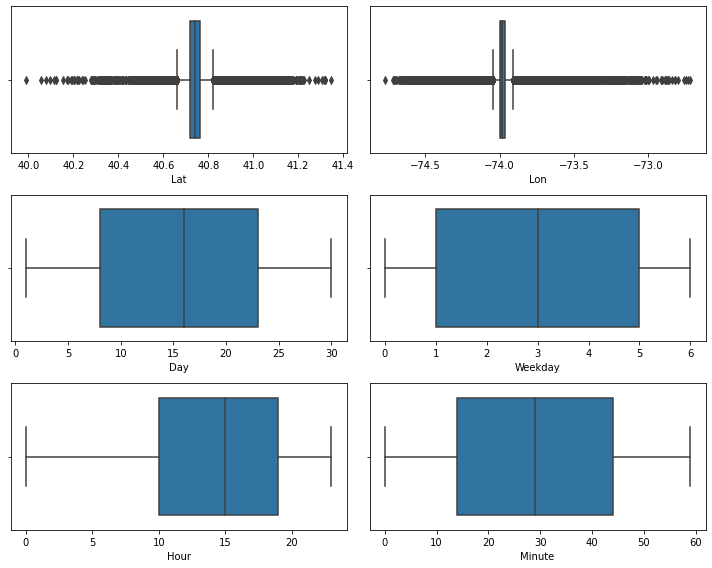

In [30]:
#Visually checking for outliers in the dataset using boxplot from seaborn library

fix,ax = plt.subplots(nrows=3,ncols=2,figsize=(10,8))

for i, subplot in zip(df_uber_num,ax.flatten()):
    sns.boxplot(df_uber_num[i],ax=subplot)
    
plt.tight_layout()
plt.show()

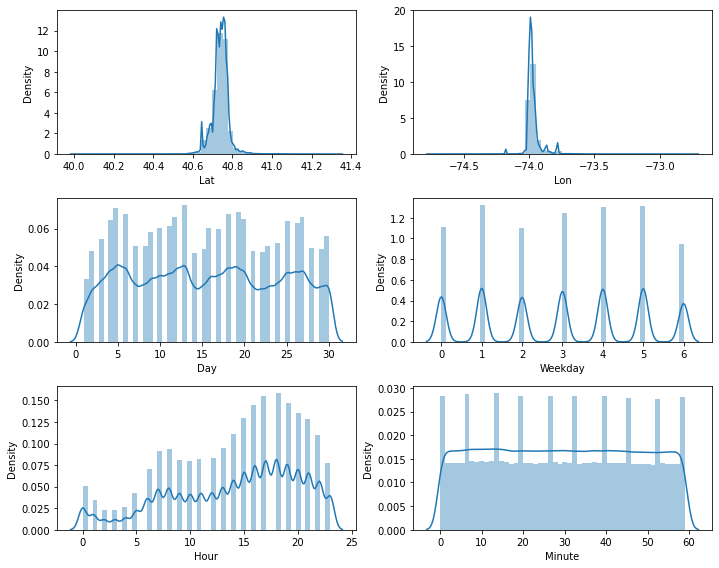

In [31]:
#Checking with distplot as well from seaborb library

fix,ax = plt.subplots(nrows=3,ncols=2,figsize=(10,8))

for i, subplot in zip(df_uber_num,ax.flatten()):
    sns.distplot(df_uber_num[i],ax=subplot)
    
plt.tight_layout()
plt.show()

              Lat       Lon       Day   Weekday      Hour    Minute
Lat      1.000000  0.046376  0.002558 -0.035468 -0.009160 -0.003142
Lon      0.046376  1.000000 -0.003939  0.002319 -0.008839 -0.003940
Day      0.002558 -0.003939  1.000000  0.049310 -0.023598 -0.000650
Weekday -0.035468  0.002319  0.049310  1.000000 -0.003776 -0.003199
Hour    -0.009160 -0.008839 -0.023598 -0.003776  1.000000 -0.011158
Minute  -0.003142 -0.003940 -0.000650 -0.003199 -0.011158  1.000000


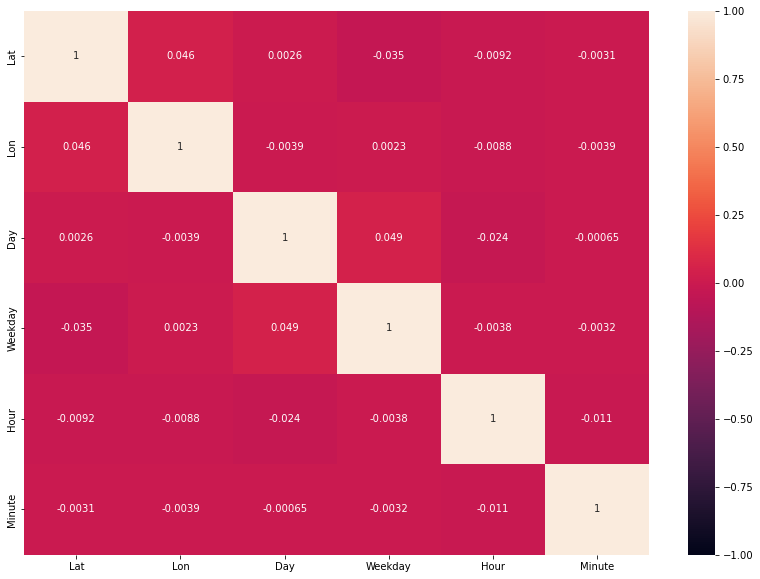

In [35]:
#Checking for correlation using .corr() and heatmap from seaborn library

print(df_uber.corr())

sns.heatmap(df_uber.corr(),annot=True,vmin=-1.0,vmax=+1.0)
plt.show()

### Now we'll go with distplot again individually for each feature to check how the distribution is to anaylze the pattern of the bookings

#### Day

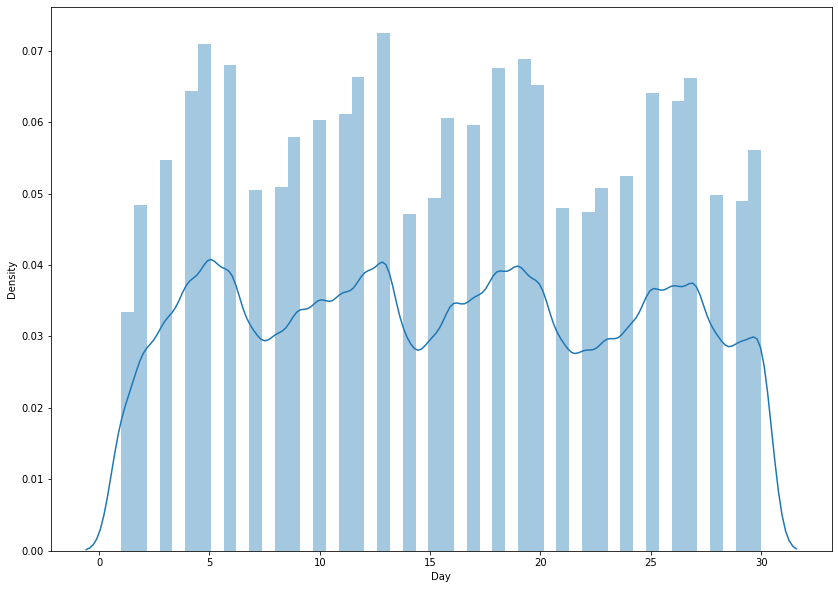

In [42]:
sns.distplot(df_uber.Day)
plt.show()

#### Weekday

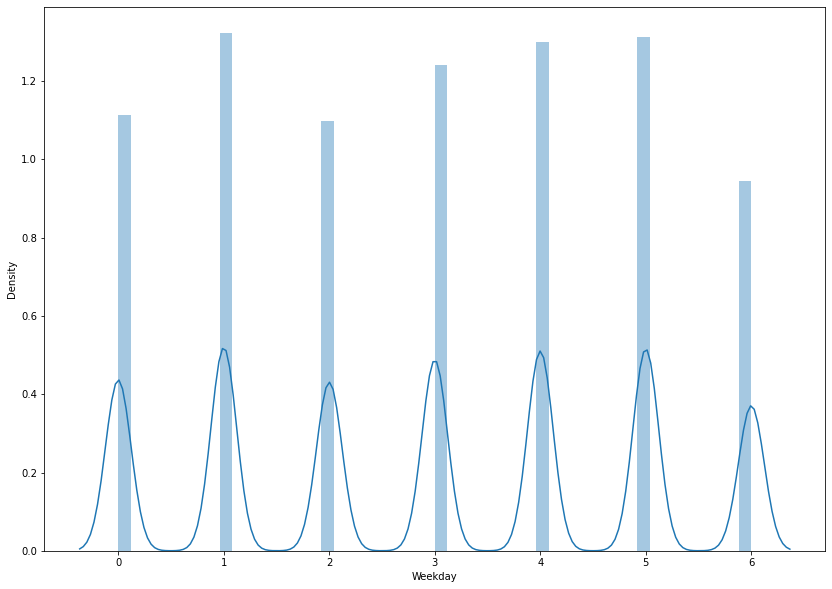

In [43]:
sns.distplot(df_uber.Weekday)
plt.show()

#### HOUR

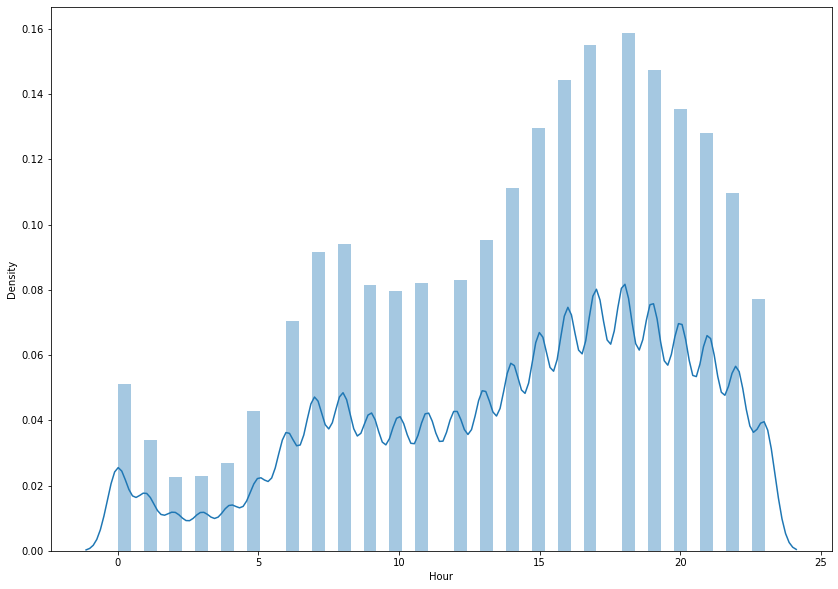

In [44]:
sns.distplot(df_uber.Hour)
plt.show()

#### As we are having the data about longitude and latitude so we can also plot the density of Uber trips according to the regions of the New Your city

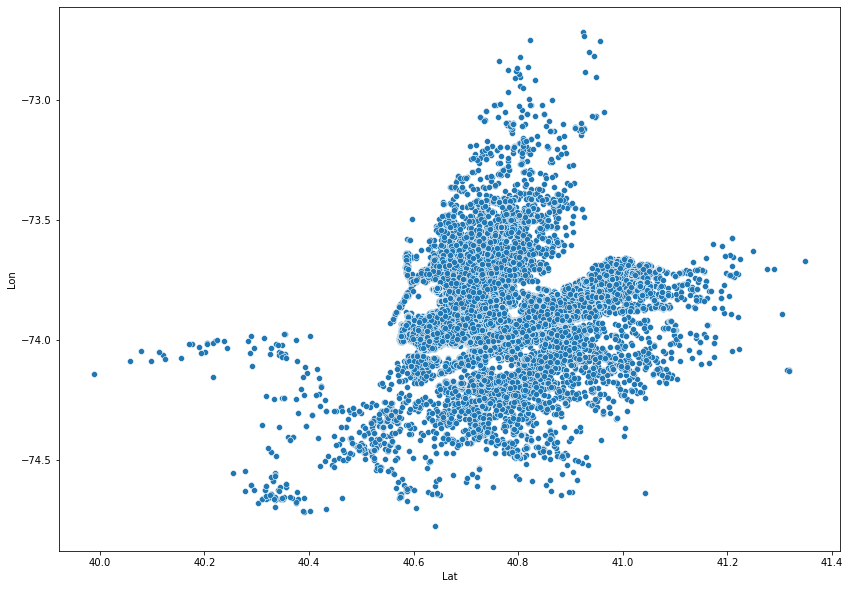

In [45]:
sns.scatterplot(data=df_uber,x='Lat',y='Lon')
plt.show()

### INSIGHTS FROM THE DATA